# ROC-AUC
> *ROC曲線の下の面積を AUC (Area Under the Curve) と呼び、分類モデルの評価指標として用いられる。AUC が 1 のときが最良であり、ランダムで全く無効なモデルでは 0.5 となる。*出典：[ROC(受信者操作特性)](https://ja.wikipedia.org/wiki/%E5%8F%97%E4%BF%A1%E8%80%85%E6%93%8D%E4%BD%9C%E7%89%B9%E6%80%A7)

- 二項分類の評価指標
- 1が最良であり、0.5は完全にランダムな予測をした状態に近い
- 0.5を下回るのは、正解とは反対の予測をしているときにあり得る
- ROC曲線をプロットすることで、分類の閾値をどうすべきか判断することができる

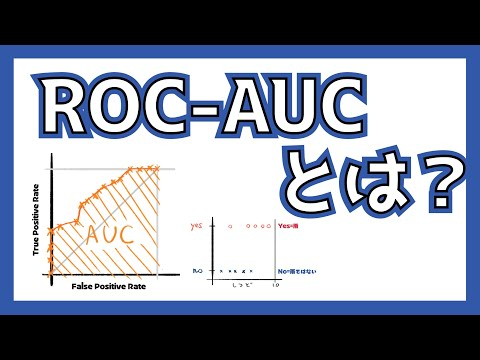

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

RND = 777

# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# youtube動画を表示
import IPython.display

IPython.display.YouTubeVideo("mU3L6gvt57g", width="500px")

# ROC Curveをプロット
```{hint}
[sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
```

## ROC Curveをプロットするための関数

In [2]:
def plot_roc_curve(test_y, pred_y):
    """正解と予測からROC Curveをプロット

    Args:
        test_y (ndarray of shape (n_samples,)): テストデータの正解
        pred_y (ndarray of shape (n_samples,)): テストデータに対する予測値
    """
    # False Positive Rate, True Positive Rateを計算
    fprs, tprs, thresholds = roc_curve(test_y, pred_y)

    # ROCをプロット
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], linestyle="-", c="k", alpha=0.2, label="ROC-AUC=0.5")
    plt.plot(fprs, tprs, color="orange", label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # ROC-AUCスコアに相当する部分を塗りつぶす
    y_zeros = [0 for _ in tprs]
    plt.fill_between(fprs, y_zeros, tprs, color="orange", alpha=0.3, label="ROC-AUC")
    plt.legend()
    plt.show()

## サンプルデータに対してモデルを作成し、ROC Curveをプロット

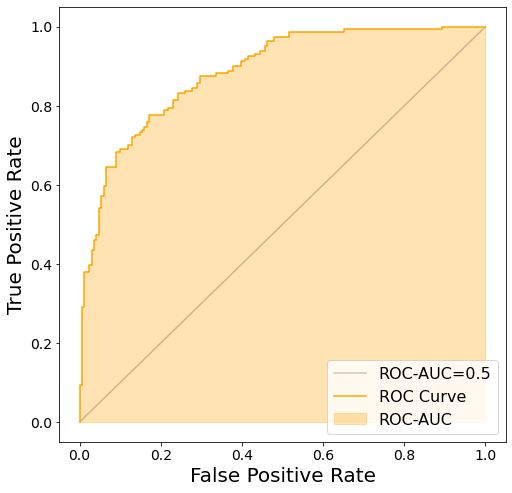

In [3]:
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    n_informative=4,
    n_clusters_per_class=3,
    random_state=RND,
)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.33, random_state=RND
)

model = RandomForestClassifier(max_depth=5)
model.fit(train_X, train_y)
pred_y = model.predict_proba(test_X)[:, 1]
plot_roc_curve(test_y, pred_y)

## ROC-AUCを計算
```{hint}
[sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
```

In [4]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, pred_y)

0.8853688117902165